## IPBMA_8: CT Slice Reconstruction
### Author: Liu Cong and Ulloa Ferrer,Leonardo

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot

In [71]:
import sys, os
from auxFiles.auxFnc import *
from auxFiles.CTFnc import *

try:
    auxFnc = os.path.join(sys.path[0], 'auxFiles', 'auxFnc.py')
    CTFnc = os.path.join(sys.path[0], 'auxFiles', 'CTFnc.py')
    %run {auxFnc}
    %run {CTFnc}
except:
    auxFnc = os.path.join('.', 'auxFiles', 'auxFnc.py')
    CTFnc = os.path.join('.', 'auxFiles', 'CTFnc.py')
    %run {phantomsFnc}
    %run {CTFnc}

# READING SINOGRAM

In [3]:
pSinograma= np.load('sinogram.npy')

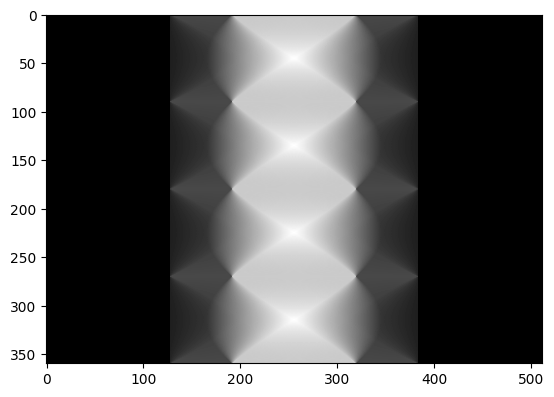

In [4]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

In [67]:
# RECONSTRUCTOR
# 8 Projections, just to check
from PIL import Image

def reconstructor(sinogram, nProj):
    rows, columns = sinogram.shape
    reconstructed_image = np.zeros((columns, columns))
    
    if nProj < rows:
        space = rows // nProj
        projections = sinogram[::space]
    else:
        projections = sinogram
    
    angles = np.linspace(0, 360, len(projections), endpoint=False)
    for i, angle in enumerate(angles):
        projection = projections[i]
        projection_img = np.tile(projection, (columns, 1))
        projection_pil = Image.fromarray((projection_img * 255).astype(np.uint8))
        rotated_projection = projection_pil.rotate(angle)
        rotated_projection_np = np.array(rotated_projection)
        reconstructed_image += rotated_projection_np
    return reconstructed_image

rImage= reconstructor(pSinograma, 8)

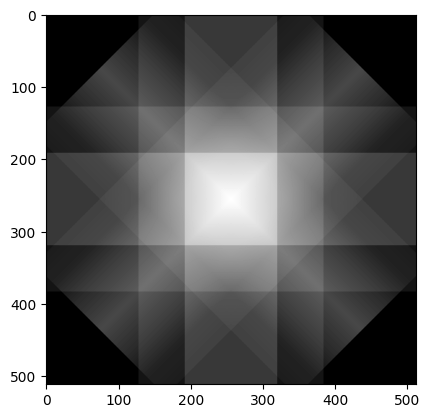

In [68]:
pyplot.imshow(rImage, cmap="gray")
pyplot.show()

In [69]:
# RECONSTRUCTOR

nProjections= 360
rImage= reconstructor(pSinograma, nProjections)

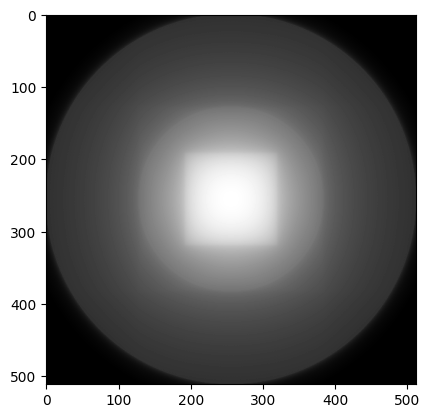

In [70]:
pyplot.imshow(rImage, cmap="gray")
pyplot.show()

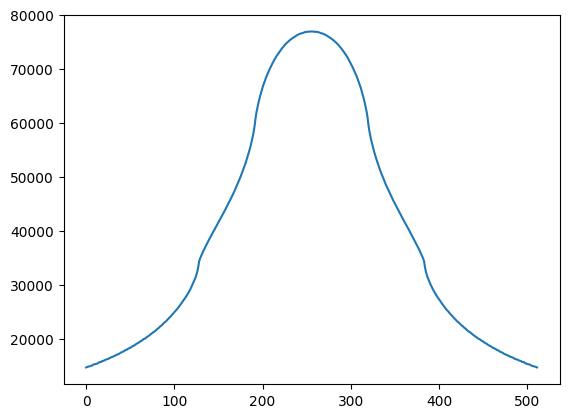

In [72]:
nLine= int(rImage.shape[0]/2)
line= getLine(rImage, nLine)

pyplot.plot(line)

In [73]:
# TRANSFORM TO HOUNSFIELD UNITS

eE= 40

hImage= setHounsfield(rImage, eE)

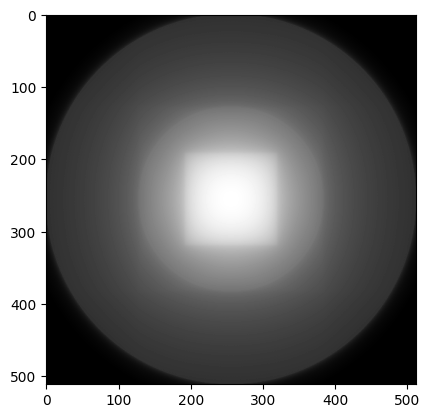

In [74]:
pyplot.imshow(hImage, cmap="gray")
pyplot.show()

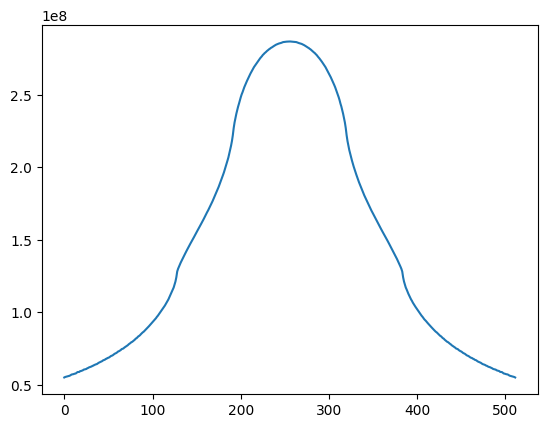

In [75]:
nLine= int(hImage.shape[0]/2)
line= getLine(hImage, nLine)

pyplot.plot(line)

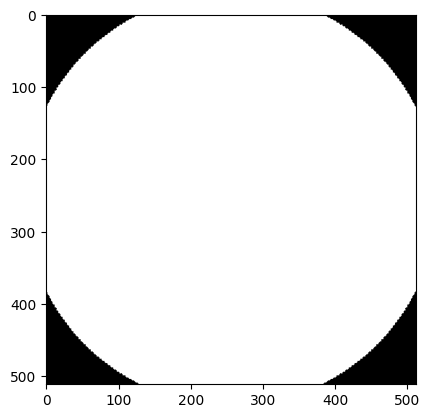

In [76]:
# W/L DISPLAY

vImage= displayWL(hImage, 50, 1500, 255)
pyplot.imshow(vImage, cmap="gray")
pyplot.show()

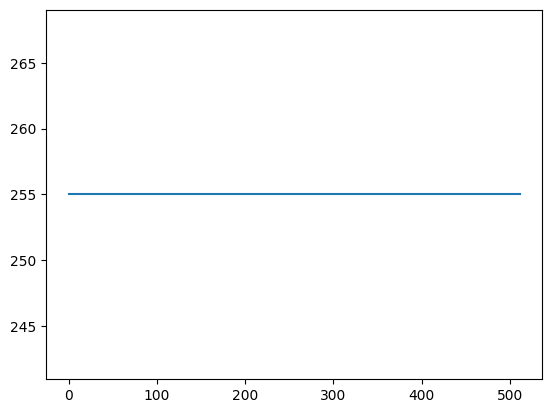

In [77]:
nLine= int(vImage.shape[0]/2)
line= getLine(vImage, nLine)

pyplot.plot(line)